# CPU and system specifications

The 'lscpu' command gives the following output:

Architecture:                    x86_64 <br>
CPU op-mode(s):                  32-bit, 64-bit <br>
Byte Order:                      Little Endian <br>
Address sizes:                   48 bits physical, 48 bits virtual <br>
CPU(s):                          24 <br>
On-line CPU(s) list:             0-23 <br>
Thread(s) per core:              2 <br>
Core(s) per socket:              12 <br>
Socket(s):                       1 <br>
NUMA node(s):                    1 <br>
Vendor ID:                       AuthenticAMD <br>
CPU family:                      25 <br>
Model:                           33 <br>
Model name:                      AMD Ryzen 9 5900X 12-Core Processor <br>
Stepping:                        0 <br>
Frequency boost:                 enabled <br>
CPU MHz:                         3700.000 <br>
CPU max MHz:                     4950.1948 <br>
CPU min MHz:                     2200.0000 <br>
BogoMIPS:                        7386.83 <br>
Virtualization:                  AMD-V <br>
L1d cache:                       384 KiB <br>
L1i cache:                       384 KiB <br>
L2 cache:                        6 MiB <br>
L3 cache:                        64 MiB <br>
NUMA node0 CPU(s):               0-23 <br>



From the output we can see the following:
1. specific make of the CPU - AMD Ryzen 9 5900X 12-Core Processor
2. Base frequency - 3.7 GHz     
3. Maximum frequency - 4.9 GHz
4. Physical cores - 12
5. Thread - 24

Cache sizes and how they are shared
1. L1 data - 384 KB or 32 KB/core
2. L1 instruction - 384 KB or 32 KB/core
3. L2 - 6 MB or 512 KB/core unified caches
4. L3 - 64 MB or 2x32 KB set associative

It should be noted memory is installed in only one channel which makes the peak memory bandwidth : <br>
Peak memory bandwidth (Single) - 23.84 GB/s (Memory or RAM, not the CPU cache)<br>
Peak GFLOPs per core - 59.2 GFLOPS/core (Theoretical, formula can be found here https://en.wikipedia.org/wiki/FLOPS) <br>

Link to specification sheets : <br>
https://www.amd.com/en/product/10461 <br>
https://en.wikichip.org/wiki/amd/ryzen_9/5900x <br>
https://boinc.bakerlab.org/rosetta/cpu_list.php


# Benchmarks

### Memory Bandwidth
The plot for memory bandwidth vs size of the array is run as follows

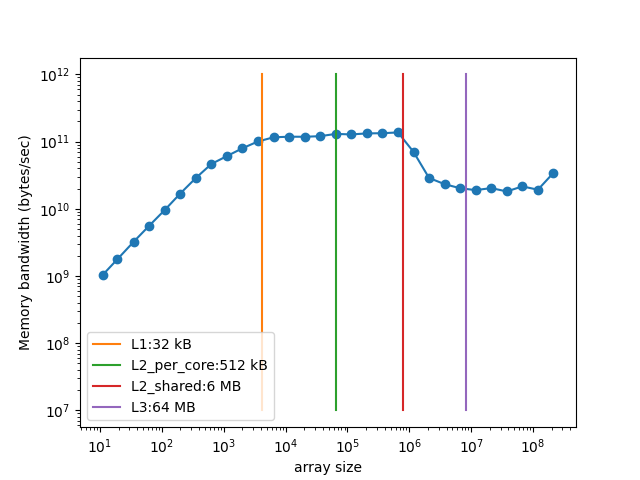

The peak memory bandwidth of the CPU was obtained as 127.52 GB/s which occurs during the transition from L1 to L1 cache. It starts dropping as the array size increases. When we come to memory installed, the single channel bandwidth is approximately 20.55 GB/s which is 86% of what is given in the specification sheet.

### FLOPS
The plot for FLOPS vs size of the array for various no.of floating point operations is as follows

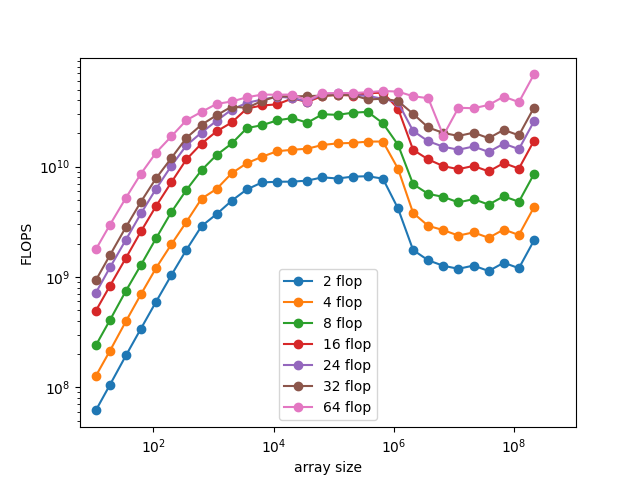

The peak GFLOPS per core recorded was 48.5508 GFLOPS/core which is approximately 82 percent of the theoretical value. For higher FLOP operations the results are weird once it is pushed into memory hinting at distribution between various pipelines of different cores.

To obtain these results I ran the benchmarking code with _governor_ set to performance mode and used the taskset command to specify which CPU the program should use.

The code to generate these results can be found here : https://github.com/Malyadeep/checkCPUperf